In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [22]:
df =pd.read_csv('./NVIDIA_STOCK.csv', parse_dates=['Date'])

In [21]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2018-02-01,4.98375,4.98750,4.86250,4.89450,355616000
1,2018-03-01,5.31175,5.34250,5.09375,5.10250,914704000
2,2018-04-01,5.33975,5.45125,5.31725,5.39400,583268000
3,2018-05-01,5.38500,5.42275,5.27700,5.35475,580124000
4,2018-08-01,5.55000,5.62500,5.46450,5.51000,881216000


In [24]:
if df['Date'].dtype == 'object':
    print("Converting 'Date' column to datetime format")
    
#df['Date'] = pd.to_datetime(df['Date'], format='mixed')

Converting 'Date' column to datetime format


In [2]:
df2 =pd.read_csv('./Microsoft_stock_data.csv', parse_dates=['Date'])

In [3]:
df2.head()

,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059500,0.062157,0.054188,0.054188,1031788800
1,1986-03-14,0.061625,0.062688,0.059500,0.059500,308160000
2,1986-03-17,0.062688,0.063219,0.061625,0.061625,133171200
3,1986-03-18,0.061093,0.063219,0.060562,0.062688,67766400
4,1986-03-19,0.060031,0.061625,0.059500,0.061093,47894400


In [47]:
df.set_index('Date', inplace=True)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9958 entries, 0 to 9957
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9958 non-null   datetime64[ns]
 1   Close   9958 non-null   float64       
 2   High    9958 non-null   float64       
 3   Low     9958 non-null   float64       
 4   Open    9958 non-null   float64       
 5   Volume  9958 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 466.9 KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1697 non-null   datetime64[ns]
 1   Close   1697 non-null   float64       
 2   High    1697 non-null   float64       
 3   Low     1697 non-null   float64       
 4   Open    1697 non-null   float64       
 5   Volume  1697 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.7 KB


In [49]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)


In [50]:
split = int(len(scaled) * 0.8)
train, val = scaled[:split], scaled[split:]

In [51]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [52]:
SEQ_LEN = 20
X_train, y_train = create_sequences(train, SEQ_LEN)
X_val, y_val = create_sequences(val, SEQ_LEN)

In [53]:
X_train = X_train.reshape(X_train.shape[0], SEQ_LEN, df.shape[1])
X_val = X_val.reshape(X_val.shape[0], SEQ_LEN, df.shape[1])

In [54]:
log_dir = "logs/lstm_only/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential([
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(df.shape[1])
])



In [55]:
model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, tensorboard]
)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 2.5591e-04 - val_loss: 0.0130
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.0600e-04 - val_loss: 0.0140
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.9832e-04 - val_loss: 0.0186
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 1.9295e-04 - val_loss: 0.0162
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 1.8626e-04 - val_loss: 0.0166
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.8352e-04 - val_loss: 0.0163
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.7957e-04 - val_loss: 0.0116
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.7978e-04 - val_loss: 0.0108
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.7858e-04 - val_loss: 0.0109
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.7964e-04 - val_loss: 0.0129
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.7927e-04 - val_loss: 0.0

In [56]:
preds = model.predict(X_val)
errors = np.mean(np.abs(preds - y_val), axis=1)

threshold = np.mean(errors) + 3*np.std(errors)
anomalies = errors > threshold

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


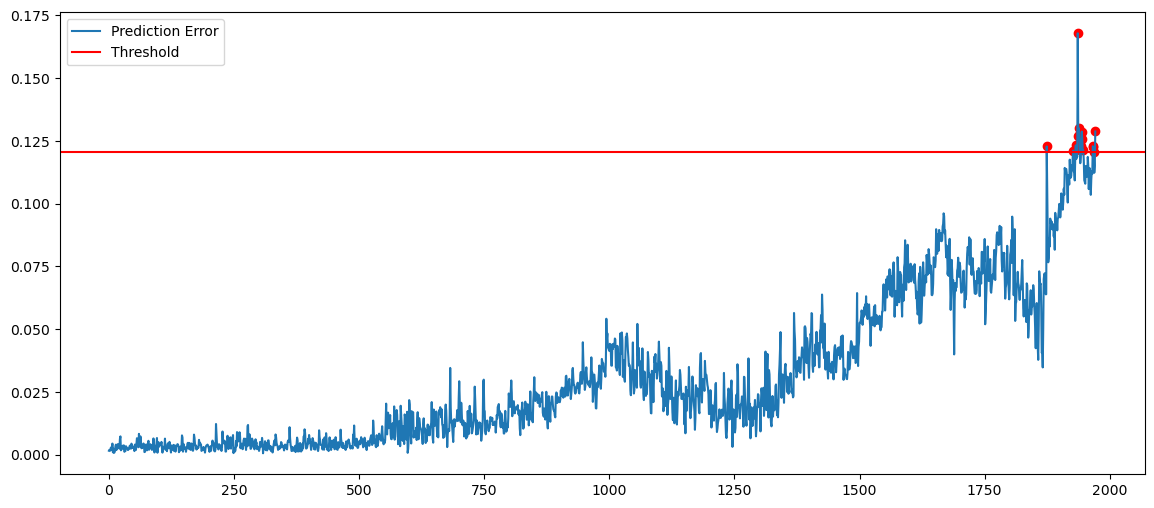

In [57]:
plt.figure(figsize=(14,6))
plt.plot(errors, label="Prediction Error")
plt.axhline(threshold, color='red', label="Threshold")
plt.scatter(np.where(anomalies)[0], errors[anomalies], color='red')
plt.legend()
plt.show()

In [58]:
print(anomalies.sum())

16
